In [78]:
import numpy as np
import matplotlib.pyplot as plt
from myphy import Mata, Meval

In [79]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
noise = np.random.normal(0, 0.1, x.shape[0])
y = y + noise

xu = np.abs(np.random.normal(0, 0.01, x.shape[0])) / 2
yu = 0.1

# outliers
y[0] = 0.8
y[-1] = 0.6

mata = Mata(x, y, yu, xu)

Text(0.5, 1.0, 'Original Data')

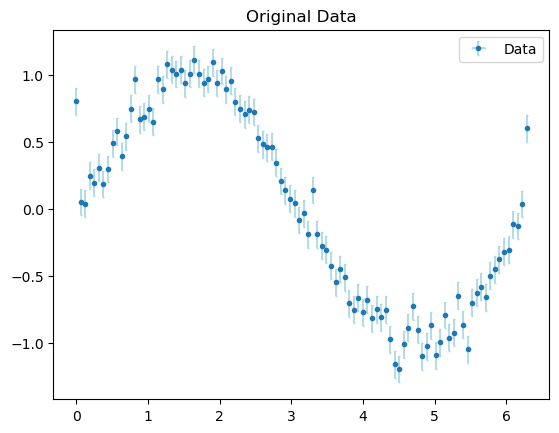

In [80]:
mata.plot_data()
plt.legend()
plt.title("Original Data")

Text(0.5, 1.0, 'Masked Data')

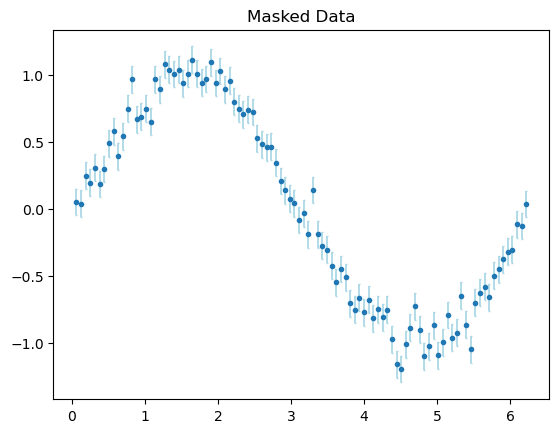

In [81]:
mask = np.ones_like(x, dtype=bool)
mask[[0,-1]] = False

mata.updateMask(mask)
mata.plot_data()
plt.title("Masked Data")

In [82]:
def ampsin(x, A):
    return A * np.sin(x)

def phasin(x, phi):
    return np.sin(x + phi)

In [83]:
sinfit = Meval(ampsin, mata)
sinpfit = Meval(phasin, mata)

sinfit.fit((1))
sinpfit.fit((0))

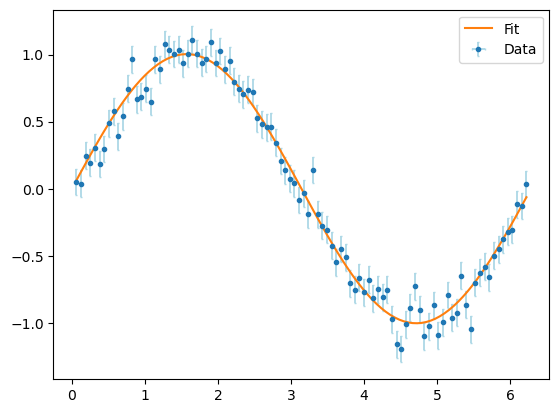

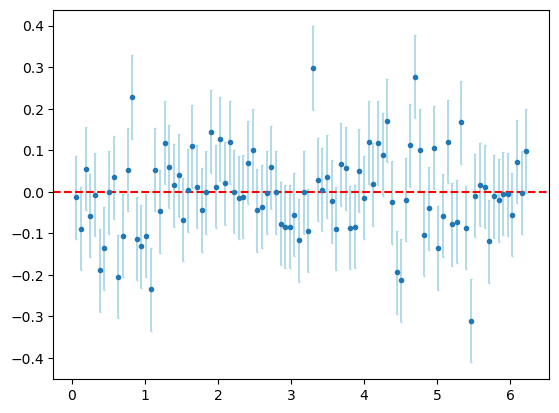

(np.float64(104.66098977164368), np.float64(1.0789792759963266), np.float64(0.2796909435544426))
[1.00339796]


In [84]:
sinfit.plot_model()
plt.legend()
plt.show()

sinfit.plot_residuals()
plt.show()

print(sinfit.stats())
print(sinfit.popt)

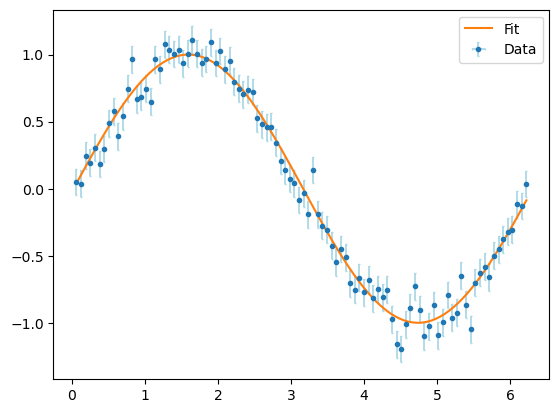

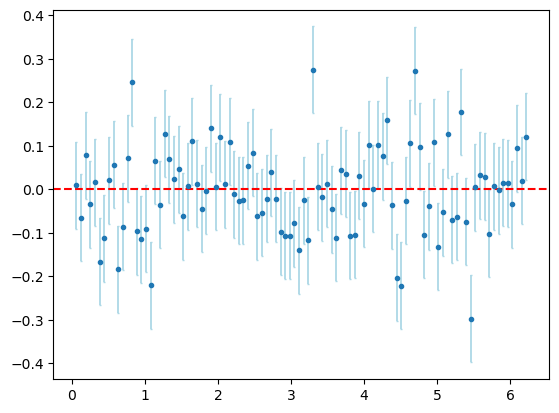

(np.float64(102.09637445076731), np.float64(1.0525399427914157), np.float64(0.3418712815544147))
[-0.02320727]


In [85]:
sinpfit.plot_model()
plt.legend()
plt.show()

sinpfit.plot_residuals()
plt.show()

print(sinpfit.stats())
print(sinpfit.popt)